# Chat2Image Creator Guide

- [ChatGPT API](https://platform.openai.com/docs/guides/chat) by OpenAI
- [Dreamlike Photoreal 2.0](https://huggingface.co/dreamlike-art/dreamlike-photoreal-2.0) by [Dreamlike Art](https://dreamlike.art/)

> Get OpenAI API key: https://platform.openai.com/account/api-keys

In [3]:
# !pip install openai
# !pip install python-dotenv

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

key = os.getenv("openai")

In [2]:
import openai

openai.api_key = key

## ChatGPT API Tutorial

In [4]:
messages = [
    {'role': 'system', 'content': 'You are a helpful assistant.'},
    {'role': 'user', 'content': 'ChatGPT에 대해 설명해줘.'},
]

res = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

res

<OpenAIObject chat.completion id=chatcmpl-72gDC9DWuTZmaz6q6kGvie1Ow2ITw at 0x105987b30> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "ChatGPT\ub294 \uc77c\ubc18 \ub300\ud654 \uc778\uacf5\uc9c0\ub2a5 \ucc57\ubd07\uc73c\ub85c, \uc774\uc6a9\uc790\ub4e4\uc774 \uac04\ub2e8\ud55c \ub300\ud654\ub97c \ud558\uba70 \uc0c8\ub85c\uc6b4 \uc815\ubcf4\ub098 \ub2f5\ubcc0\uc744 \uc5bb\uc744 \uc218 \uc788\ub294 \uc6f9\uc0ac\uc774\ud2b8\uc785\ub2c8\ub2e4. \uc774 \ucc57\ubd07\uc740 \ub2e4\uc591\ud55c \uc8fc\uc81c\uc5d0 \ub300\ud574 \ub300\ud654\ub97c \uc8fc\ub3c4\ud560 \uc218 \uc788\uc73c\uba70, \ubcf4\ud1b5 \uc77c\uc0c1\uc801\uc778 \ub300\ud654\ub098 \uad81\uae08\ud55c \uc810\uc774 \uc788\ub294 \uacbd\uc6b0\uc5d0 \ub300\ud654\ub97c \uc2dc\uc791\ud558\uac8c \ub429\ub2c8\ub2e4. \n\nChatGPT\ub294 \uc774\uc6a9\uc790\ub4e4\uc774 \uc785\ub825\ud55c \uc9c8\ubb38 \ud639\uc740 \uc694\uccad\uc5d0 \ub9de\uac8c \uc815\ubcf4\ub97c \uac80\uc0c9\ud5

In [5]:
msg = res['choices'][0]['message']['content']

msg

'ChatGPT는 일반 대화 인공지능 챗봇으로, 이용자들이 간단한 대화를 하며 새로운 정보나 답변을 얻을 수 있는 웹사이트입니다. 이 챗봇은 다양한 주제에 대해 대화를 주도할 수 있으며, 보통 일상적인 대화나 궁금한 점이 있는 경우에 대화를 시작하게 됩니다. \n\nChatGPT는 이용자들이 입력한 질문 혹은 요청에 맞게 정보를 검색하고, 적절한 답변을 제공합니다. 이러한 대화 과정에서 ChatGPT는 항상 이용자들의 입력과 요청을 기억해두며, 이전 대화 내용을 기반으로 새로운 대화를 이어 나갈 수 있습니다. \n\n또한 ChatGPT는 자연어 처리(NLP)를 기반으로 작동하여, 이용자들이 일상적인 자연어로 대화를 할 수 있으며, 쉽게 의사소통이 가능합니다. ChatGPT는 이용자들에게 웹사이트 경험을 개선하고, 커뮤니케이션을 쉽게 할 수 있게 도와줍니다.'

In [10]:
messages.append({
    'role': 'assistant',
    'content': msg
})

messages.append({
    'role': 'user',
    'content': '위의 문장을 50자로 요약해줘.'
})

res = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

res['choices'][0]['message']['content']

'ChatGPT는 인공지능 챗봇으로, 인간과 자연스러운 대화를 가능하게 하며, 자연어 처리 및 딥 러닝으로 작동합니다.'

## Dreamlike Photoreal Tutorial

In [6]:
# !pip install transformers
# !pip install accelerate
# torch 설치
# !pip3 install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cpu
# !conda install pytorch
# !pip install diffusers

In [4]:
from diffusers import StableDiffusionPipeline
import torch

model_id = 'dreamlike-art/dreamlike-photoreal-2.0'
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

Fetching 12 files: 100%|██████████| 12/12 [00:00<00:00, 223696.21it/s]
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [7]:
pipe = pipe.to('cuda')
# pipe = pipe.to('mps')

100%|██████████| 50/50 [03:28<00:00,  4.18s/it]


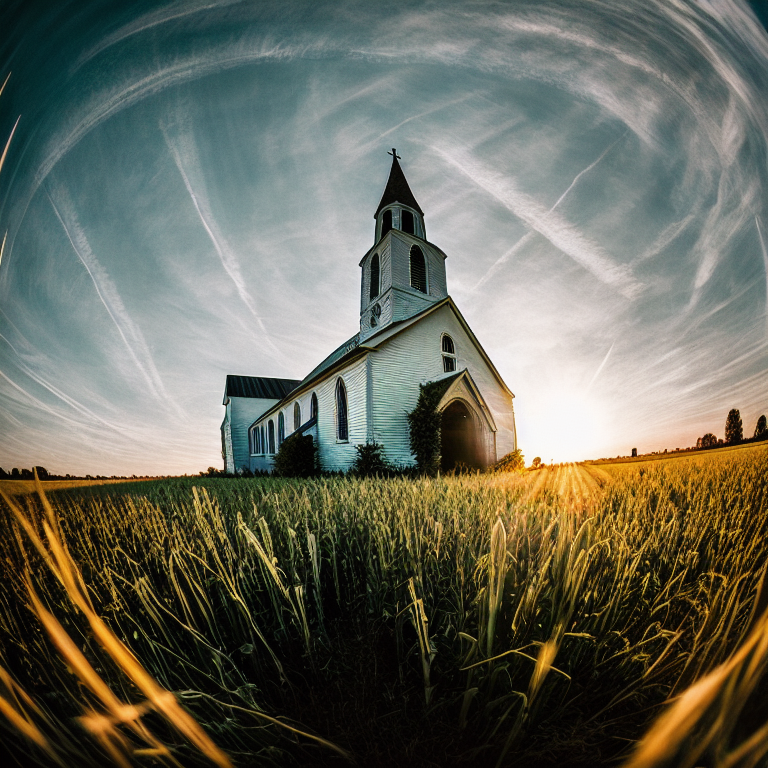

In [8]:
prompt = 'photo, a church in the middle of a field of crops, bright cinematic lighting, gopro, fisheye lens'

pipe(prompt).images[0]

## Process for Chat2Image Creator

In [57]:
messages = [{
    'role': 'system',
    'content': 'You are a helpful assistant for organizing prompt for generating images.'
}]

messages

[{'role': 'system',
  'content': 'You are a helpful assistant for organizing prompt for generating images.'}]

In [58]:
messages.append({
    'role': 'user',
    'content': '이 세상에 존재하지 않는 동물을 상상해줘.'
})

res = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

msg = res['choices'][0]['message']['content']

msg

'공중을 날아 다니며 긴 꼬리와 빨간 날개를 가진 황금색 바람새.'

In [59]:
messages.append({
    'role': 'assistant',
    'content': msg
})

messages.append({
    'role': 'user',
    'content': '이 동물의 외형을 더 자세하게 묘사해줘.'
})

res = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

msg = res['choices'][0]['message']['content']

msg

'이 바람새는 길이가 약 60cm 정도이며, 몸무게는 매우 가볍습니다. 체색은 눈부실 정도로 황금빛이 도는 깃털로 뒤쪽에는 긴 꼬리가 달려있으며, 머리부분에는 독특한 두 개의 뿔 모양 깃털이 있습니다. 날개는 빨간색으로, 깃털 끝에는 노란색 줄무늬가 있어서 자연에 잘 어울립니다. 바람새는 아주 빠른 속도로 날아 다닐 수 있어서 공중에서 자유롭게 자신의 생활을 할 수 있습니다.'

In [60]:
messages.append({
    'role': 'assistant',
    'content': msg
})

messages.append({
    'role': 'user',
    'content': '위 문장을 영어로 번역해줘.'
})

res = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

msg = res['choices'][0]['message']['content']

msg

'Imagine an animal that does not exist in the world. A golden wind bird with long tail and red wings flying in the air. This bird is about 60 cm long and very light in weight. Its feathers are shining golden, and it has unique two feather-like horns on its head. The wings are red, with yellow stripes at the end of the feathers that seamlessly blend with nature. The wind bird can fly at a very fast speed, allowing it the freedom to live its life in the air.'

In [61]:
messages.append({
    'role': 'assistant',
    'content': msg
})

messages.append({
    'role': 'user',
    'content': 'Condense the description to focus on nouns and adjectives separated by ,'
})

res = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

prompt = res['choices'][0]['message']['content']

prompt

'animal, golden wind bird, long tail, red wings, 60 cm, light weight, shining golden feathers, two horn-like feathers, fast speed, freedom, air.'

  0%|          | 0/50 [00:00<?, ?it/s]

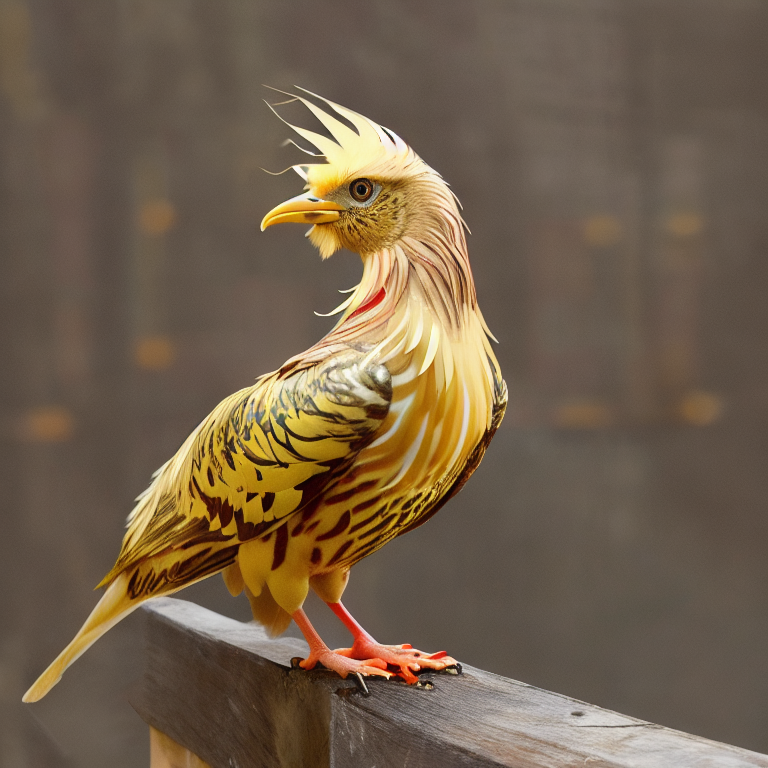

In [66]:
pipe(prompt).images[0]